# This notebook will show the implementation of NLP upon text reviews in our database of Amazon reviews. 

## We will explain each step and their results.

We import all the libraries we will work with:

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Now, we can upload/import the database and observe it:

In [4]:
amazon_reviews = pd.read_csv("Amazon Reviews 1.csv")
amazon_reviews

/tmp/ipykernel_1989483/303157925.py:1: DtypeWarning: Columns (1,10) have mixed types. Specify dtype option on import or set low_memory=False.
  amazon_reviews = pd.read_csv("Amazon Reviews 1.csv")
/usr/local/Anaconda3-2023.07-1/lib/python3.11/site-packages/IPython/lib/pretty.py:778: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  output = repr(obj)
/usr/local/Anaconda3-2023.07-1/lib/python3.11/site-packages/IPython/core/formatters.py:344: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  return method()


,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34655,AVpfiBlyLJeJML43-4Tp,NaN,B006GWO5WK,Amazon,"Computers/Tablets & Networking,Tablet & eBook ...",newamazonkindlefirehd9wpowerfastadaptercharger...,"Amazon Digital Services, Inc",2012-09-18T00:00:00Z,NaN,2015-08-29T00:00:00Z,...,NaN,NaN,NaN,3.0,http://www.amazon.com/Amazon-PowerFast-Adapter...,This is not appreciably faster than any other ...,Not appreciably faster than any other 1.8A cha...,NaN,NaN,Kris
34656,AVpfiBlyLJeJML43-4Tp,NaN,B006GWO5WK,Amazon,"Computers/Tablets & Networking,Tablet & eBook ...",newamazonkindlefirehd9wpowerfastadaptercharger...,"Amazon Digital Services, Inc",2012-11-21T00:00:00Z,NaN,2015-09-02T00:00:00Z,...,NaN,NaN,NaN,1.0,http://www.amazon.com/Amazon-PowerFast-Adapter...,Amazon should include this charger with the Ki...,Should be included,NaN,NaN,Jonathan Stewart
34657,AVpfiBlyLJeJML43-4Tp,NaN,B006GWO5WK,Amazon,"Computers/Tablets & Networking,Tablet & eBook ...",newamazonkindlefirehd9wpowerfastadaptercharger...,"Amazon Digital Services, Inc",2012-10-19T00:00:00Z,NaN,2015-09-04T00:00:00Z,...,NaN,NaN,NaN,1.0,http://www.amazon.com/Amazon-PowerFast-Adapter...,Love my Kindle Fire but I am really disappoint...,Disappointing Charger,NaN,NaN,J Lawson
34658,AVpfiBlyLJeJML43-4Tp,NaN,B006GWO5WK,Amazon,"Computers/Tablets & Networking,Tablet & eBook ...",newamazonkindlefirehd9wpowerfastadaptercharger...,"Amazon Digital Ser

To better understand what we are working with 

In [5]:
amazon_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    34660 non-null  object 
 1   name                  27900 non-null  object 
 2   asins                 34658 non-null  object 
 3   brand                 34660 non-null  object 
 4   categories            34660 non-null  object 
 5   keys                  34660 non-null  object 
 6   manufacturer          34660 non-null  object 
 7   reviews.date          34621 non-null  object 
 8   reviews.dateAdded     24039 non-null  object 
 9   reviews.dateSeen      34660 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   34066 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    34131 non-null  float64
 14  reviews.rating        34627 non-null  float64
 15  reviews.sourceURLs 

In [6]:
amazon_reviews.describe()

,reviews.id,reviews.numHelpful,reviews.rating,reviews.userCity,reviews.userProvince
count,1.0,34131.000000,34627.000000,0.0,0.0
mean,111372787.0,0.630248,4.584573,NaN,NaN
std,NaN,13.215775,0.735653,NaN,NaN
min,111372787.0,0.000000,1.000000,NaN,NaN
25%,111372787.0,0.000000,4.000000,NaN,NaN
50%,111372787.0,0.000000,5.000000,NaN,NaN
75%,111372787.0,0.000000,5.000000,NaN,NaN
max,111372787.0,814.000000,5.000000,NaN,NaN


Observe that we have null or empty entries, let us drop them:

In [13]:
amazon_reviews.dropna(subset = ["reviews.text"])
amazon_reviews.dropna(subset = ["reviews.title"])
amazon_reviews.dropna(subset = ["reviews.rating"])
amazon_reviews.describe()

,reviews.id,reviews.numHelpful,reviews.rating,reviews.userCity,reviews.userProvince
count,1.0,34131.000000,34627.000000,0.0,0.0
mean,111372787.0,0.630248,4.584573,NaN,NaN
std,NaN,13.215775,0.735653,NaN,NaN
min,111372787.0,0.000000,1.000000,NaN,NaN
25%,111372787.0,0.000000,4.000000,NaN,NaN
50%,111372787.0,0.000000,5.000000,NaN,NaN
75%,111372787.0,0.000000,5.000000,NaN,NaN
max,111372787.0,814.000000,5.000000,NaN,NaN


In [14]:
amazon_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    34660 non-null  object 
 1   name                  27900 non-null  object 
 2   asins                 34658 non-null  object 
 3   brand                 34660 non-null  object 
 4   categories            34660 non-null  object 
 5   keys                  34660 non-null  object 
 6   manufacturer          34660 non-null  object 
 7   reviews.date          34621 non-null  object 
 8   reviews.dateAdded     24039 non-null  object 
 9   reviews.dateSeen      34660 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   34066 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    34131 non-null  float64
 14  reviews.rating        34627 non-null  float64
 15  reviews.sourceURLs 

Now, we observe that the columns we will work with are id (or name, they are correlated) and reviews.text. We will create a new database with these two and add a column based on the reviews.rating :

- 5 : good (2)
- 3, 4 : neutral (1)
- 1, 2 : bad

In [16]:
amazon = amazon_reviews[["id", "reviews.text"]]
amazon

,id,reviews.text
0,AVqkIhwDv8e3D1O-lebb,This product so far has not disappointed. My c...
1,AVqkIhwDv8e3D1O-lebb,great for beginner or experienced person. Boug...
2,AVqkIhwDv8e3D1O-lebb,Inexpensive tablet for him to use and learn on...
3,AVqkIhwDv8e3D1O-lebb,I've had my Fire HD 8 two weeks now and I love...
4,AVqkIhwDv8e3D1O-lebb,I bought this for my grand daughter when she c...
...,...,...
34655,AVpfiBlyLJeJML43-4Tp,This is not appreciably faster than any other ...
34656,AVpfiBlyLJeJML43-4Tp,Amazon should include this charger with the Ki...
34657,AVpfiBlyLJeJML43-4Tp,Love my Kindle Fire but I am really disappoint...
34658,AVpfiBlyLJeJML43-4Tp,I was surprised to find it did not come with a...


In [24]:
def label(r):
    if r == 5:
        return 2
    elif r == 3 or r == 4:
        return 1
    return 0

amazon["rating"] = amazon_reviews["reviews.rating"].apply(label)

/tmp/ipykernel_1989483/2928878305.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amazon["rating"] = amazon_reviews["reviews.rating"].apply(label)


Now we have the final database we will work for this NLP implementation.

In [25]:
amazon

,id,reviews.text,rating
0,AVqkIhwDv8e3D1O-lebb,This product so far has not disappointed. My c...,2
1,AVqkIhwDv8e3D1O-lebb,great for beginner or experienced person. Boug...,2
2,AVqkIhwDv8e3D1O-lebb,Inexpensive tablet for him to use and learn on...,2
3,AVqkIhwDv8e3D1O-lebb,I've had my Fire HD 8 two weeks now and I love...,1
4,AVqkIhwDv8e3D1O-lebb,I bought this for my grand daughter when she c...,2
...,...,...,...
34655,AVpfiBlyLJeJML43-4Tp,This is not appreciably faster than any other ...,1
34656,AVpfiBlyLJeJML43-4Tp,Amazon should include this charger with the Ki...,0
34657,AVpfiBlyLJeJML43-4Tp,Love my Kindle Fire but I am really disappoint...,0
34658,AVpfiBlyLJeJML43-4Tp,I was surprised to find it did not come with a...,0


## We will now perform some data exploration in order to observe how our database behaves

<Axes: >

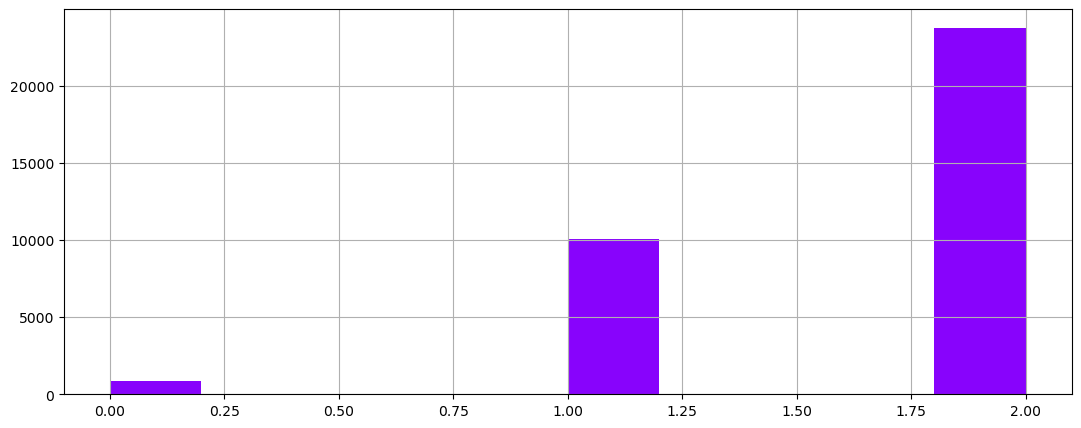

In [27]:
amazon['rating'].hist(figsize = (13,5), color = '#8803fc')

From the previous plot we can observe how the ratings of 2 are predominant, so we have a lot of positive impressions. Anyhow, we have enough entries for worse ones to understand how they behave.

Now, we will have a look at good, neutral and bad reviews:

In [29]:
good = amazon[amazon['rating'] == 2]
good

,id,reviews.text,rating
0,AVqkIhwDv8e3D1O-lebb,This product so far has not disappointed. My c...,2
1,AVqkIhwDv8e3D1O-lebb,great for beginner or experienced person. Boug...,2
2,AVqkIhwDv8e3D1O-lebb,Inexpensive tablet for him to use and learn on...,2
4,AVqkIhwDv8e3D1O-lebb,I bought this for my grand daughter when she c...,2
5,AVqkIhwDv8e3D1O-lebb,This amazon fire 8 inch tablet is the perfect ...,2
...,...,...,...
34646,AVpggqsrLJeJML43O5zp,I have only used it one time to download an e-...,2
34647,AVpfiBlyLJeJML43-4Tp,Excellent charging quality with heavy duty cor...,2
34648,AVpfiBlyLJeJML43-4Tp,This charger (9W) rapid charger is as describe...,2
34649,AVpfiBlyLJeJML43-4Tp,just what i expected and just what I wanted. t...,2


In [30]:
neutral = amazon[amazon['rating'] == 1]
neutral

,id,reviews.text,rating
3,AVqkIhwDv8e3D1O-lebb,I've had my Fire HD 8 two weeks now and I love...,1
6,AVqkIhwDv8e3D1O-lebb,"Great for e-reading on the go, nice and light ...",1
10,AVqkIhwDv8e3D1O-lebb,Not easy for elderly users cease of ads that p...,1
12,AVqkIhwDv8e3D1O-lebb,Wanted my father to have his first tablet and ...,1
16,AVqkIhwDv8e3D1O-lebb,nice reader. almost perfect for what i want/ne...,1
...,...,...,...
34627,AV1YE_muvKc47QAVgpwE,"Hey Alexa, Hey Alexa - Night and day it's Hey ...",1
34630,AVpf_znpilAPnD_xlvAF,My new Kindle DX2 graphite came yesterday and ...,1
34638,AVpf_znpilAPnD_xlvAF,This cover is a replacement for the initial co...,1
34641,AVpggqsrLJeJML43O5zp,Amazon already includes this cable with the Ki...,1


In [31]:
bad = amazon[amazon['rating'] == 0]
bad

,id,reviews.text,rating
117,AVqkIhwDv8e3D1O-lebb,Didn't have some of the features I was looking...,0
126,AVqkIhwDv8e3D1O-lebb,i Bought this around black friday for $60 hopi...,0
169,AVqkIhwDv8e3D1O-lebb,I bought this tablet for my 4 year old daughte...,0
241,AVqkIhwDv8e3D1O-lebb,Didn't want to go to the sites amazon wanted m...,0
281,AVqkIhwDv8e3D1O-lebb,Not a good product short battery life i can on...,0
...,...,...,...
34654,AVpfiBlyLJeJML43-4Tp,This is exactly like any other usb power charg...,0
34656,AVpfiBlyLJeJML43-4Tp,Amazon should include this charger with the Ki...,0
34657,AVpfiBlyLJeJML43-4Tp,Love my Kindle Fire but I am really disappoint...,0
34658,AVpfiBlyLJeJML43-4Tp,I was surprised to find it did not come with a...,0


We may notice that we have $23775$ positive entries, $10040$ neutral and only $845$ bad ones.

In order to better observe and understand these categories we can plot some wordclouds and analyze them.

In [35]:
!pip install wordcloud
from wordcloud import WordCloud

Defaulting to user installation because normal site-packages is not writeable


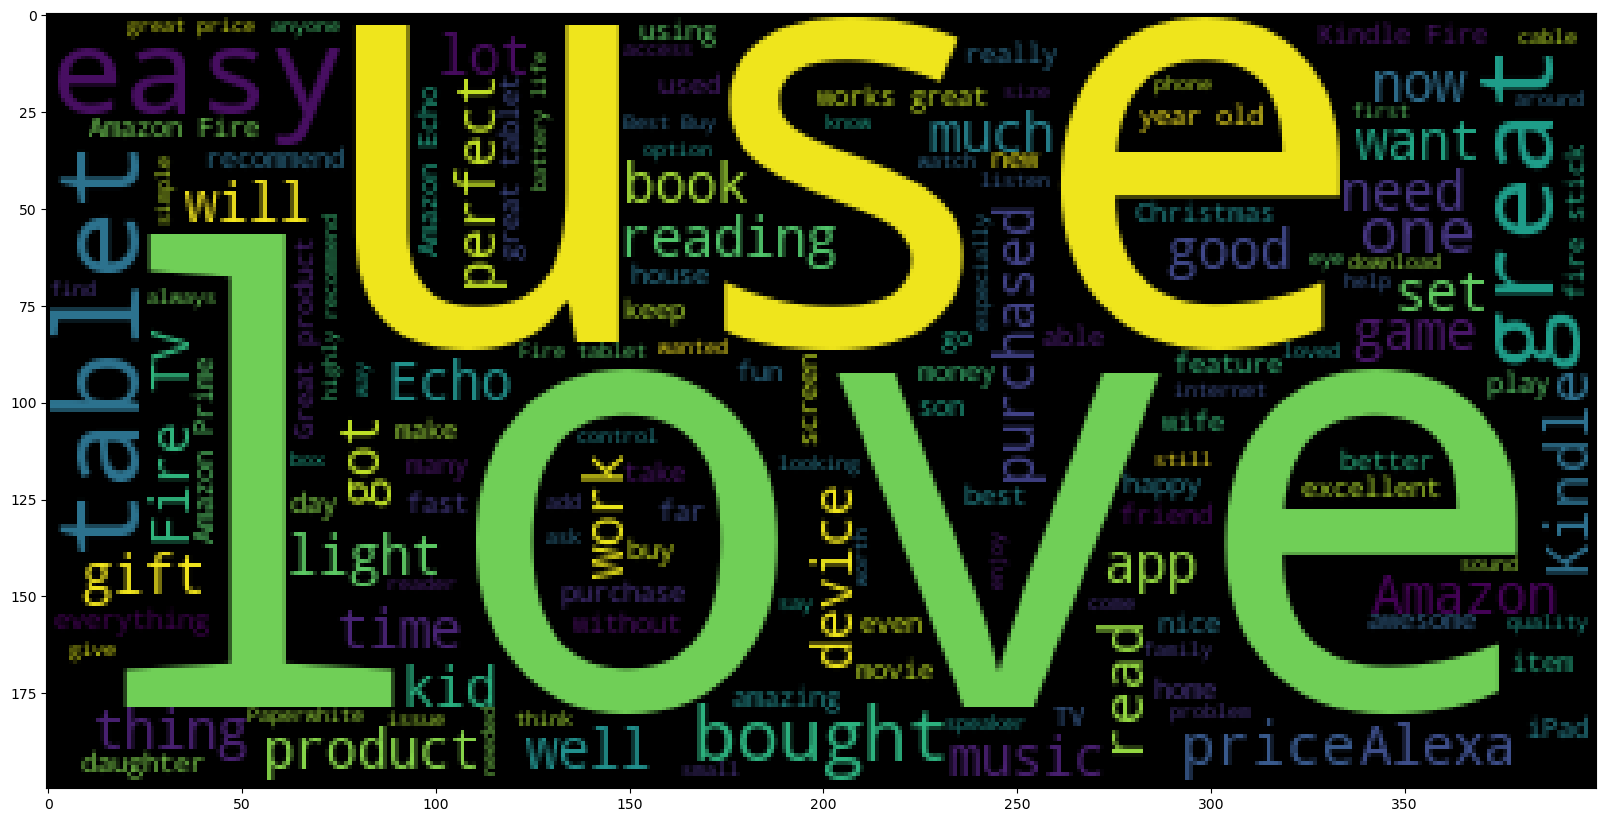

In [47]:
goods = good['reviews.text'].tolist()
goods = [str(x) for x in goods]
goods_sentence = " ".join(goods)
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(goods_sentence))

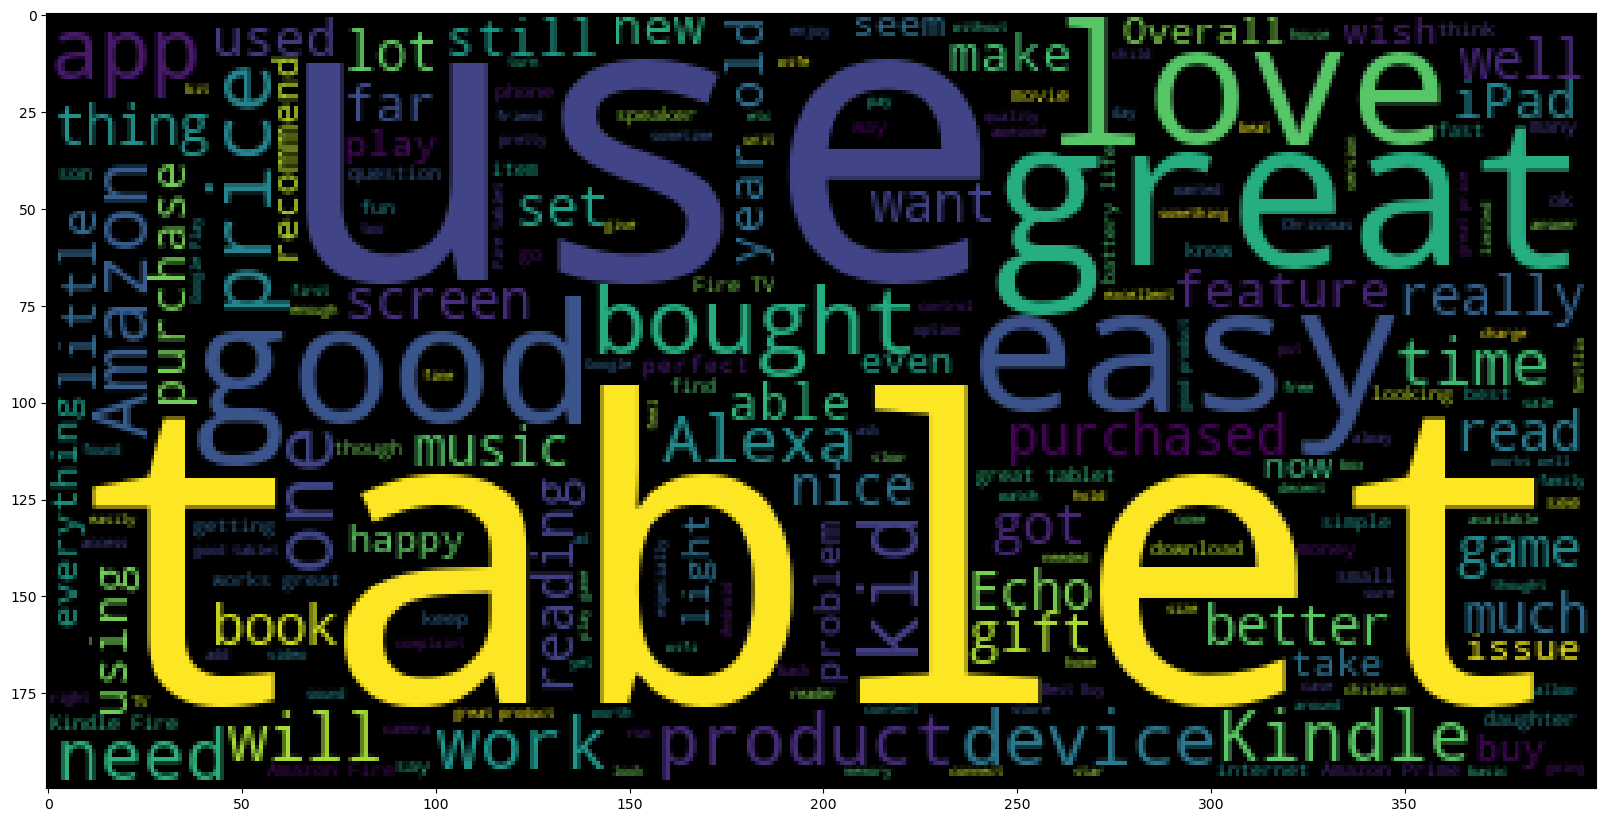

In [49]:
neutrals = neutral['reviews.text'].tolist()
neutrals = [str(x) for x in neutrals]
neutrals_sentence = " ".join(neutrals)
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(neutrals_sentence))

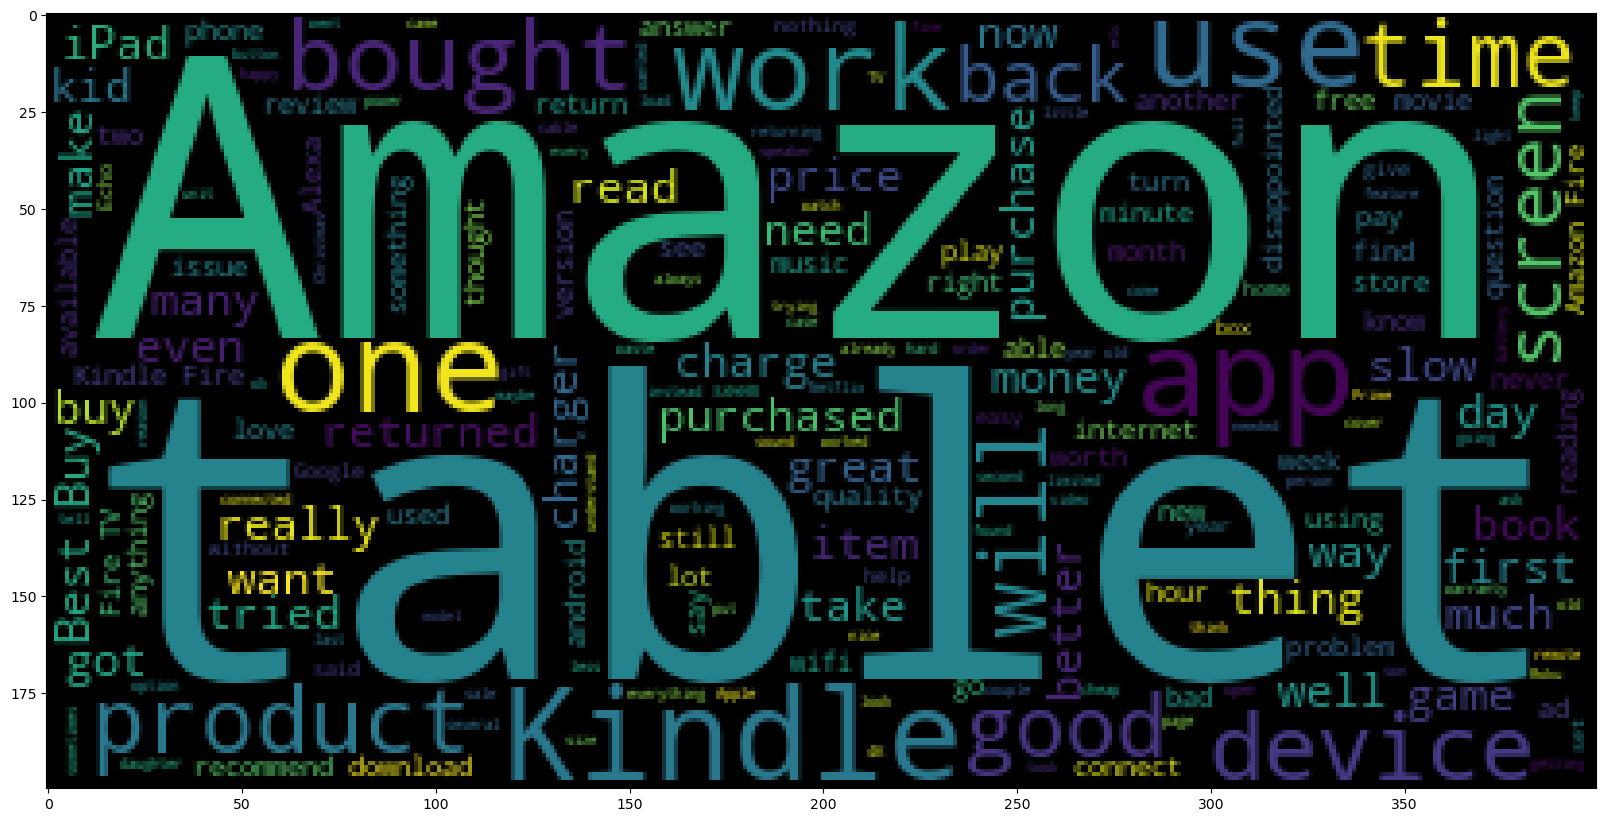

In [51]:
bads = bad['reviews.text'].tolist()
bads = [str(x) for x in bads]
bads_sentence = " ".join(bads)
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(bads_sentence))

# Now that we have a clearer image upon our database, it is time we make sure we have the best data. How? Data cleaning!

## Punctuation

In [52]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [57]:
g = []
for s in goods:
    sentence = [c for c in s if c not in string.punctuation]
    s = ''.join(sentence)
    g.append(s)
goods = g
goods

['This product so far has not disappointed My children love to use it and I like the ability to monitor control what content they see with ease',
 'great for beginner or experienced person Bought as a gift and she loves it',
 'Inexpensive tablet for him to use and learn on step up from the NABI He was thrilled with it learn how to Skype on it already',
 'I bought this for my grand daughter when she comes over to visit I set it up with her as the user entered her age and name and now Amazon makes sure that she only accesses sites and content that are appropriate to her age Simple to do and she loves the capabilities I also bought and installed a 64gig SD card which gives this little tablet plenty of storage For the price I think this tablet is best one out there You can spend hundreds of dollars more for additional speed and capacity but when it comes to the basics this tablets does everything that most people will ever need at a fraction of the cost',
 'This amazon fire 8 inch tablet i

In [58]:
n = []
for s in neutrals:
    sentence = [c for c in s if c not in string.punctuation]
    s = ''.join(sentence)
    n.append(s)
neutrals = n
neutrals

['Ive had my Fire HD 8 two weeks now and I love it This tablet is a great valueWe are Prime Members and that is where this tablet SHINES I love being able to easily access all of the Prime content as well as movies you can download and watch laterThis has a 1280800 screen which has some really nice look to it its nice and crisp and very bright infact it is brighter then the ipad pro costing 900 base model The build on this fire is INSANELY AWESOME running at only 77mm thick and the smooth glossy feel on the back it is really amazing to hold its like the futuristic tab in ur hands',
 'Great for ereading on the go nice and light weight and for the price point given definitely worth the purchase',
 'Not easy for elderly users cease of ads that pop up',
 'Wanted my father to have his first tablet and this is a very good value He can watch movies and play a few games Easy enough for him to use',
 'nice reader almost perfect for what i wantneed good bargain',
 'I really like this tablet I wo

In [59]:
b = []
for s in bads:
    sentence = [c for c in s if c not in string.punctuation]
    s = ''.join(sentence)
    b.append(s)
bads = b
bads

['Didnt have some of the features I was looking for Returned it the next day May be good for others',
 'i Bought this around black friday for 60 hoping it would be awesome it failed so hard i tried multiple different micro SD cards none of which were recognized and YES i formated them with every format i could think of  Fat32 NTFS Fat Xfat i even tried to have the tablet do it didnt work to make matters worse half the apps i wanted to use werent in the app store and i came to find out that it isnt linked to the normal google play store this tablet has its own app store which is missing many common apps the main reason i bought this was to play clash of clans and i cant because it wasnt on the app store i tried to also use aftermarket play stores to play COC but it didnt work launched and played 1 time but didnt work or update after that needless to say i returned it and bought a 250 samsung galaxy tab A 101 2016 version with Spen and its WAYYYYY better bottom line you get what you pay 

## Stopwords

In [60]:
import nltk # Natural Language tool kit 
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /users/eleves-a/2022/marta-teodora.trales/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [62]:
g = []
for s in goods:
    sentence = [word for word in s.split() if word not in stopwords.words('english')]
    s = ' '.join(sentence)
    g.append(s)

goods = g
goods

['This product far disappointed My children love use I like ability monitor control content see ease',
 'great beginner experienced person Bought gift loves',
 'Inexpensive tablet use learn step NABI He thrilled learn Skype already',
 'I bought grand daughter comes visit I set user entered age name Amazon makes sure accesses sites content appropriate age Simple loves capabilities I also bought installed 64gig SD card gives little tablet plenty storage For price I think tablet best one You spend hundreds dollars additional speed capacity comes basics tablets everything people ever need fraction cost',
 'This amazon fire 8 inch tablet perfect size I purchased husband bigger screen phone He gotten one years ago I knew would good purchase',
 'I gave Christmas gift inlaws husband uncle They loved easy use fantastic features',
 'Great device read books I like links borrowed library ebooks Switched another popular tablet brand I happy choice I made It took time get books previous nonKindle re

In [63]:
n = []
for s in neutrals:
    sentence = [word for word in s.split() if word not in stopwords.words('english')]
    s = ' '.join(sentence)
    g=n.append(s)

neutrals = n
neutrals

['Ive Fire HD 8 two weeks I love This tablet great valueWe Prime Members tablet SHINES I love able easily access Prime content well movies download watch laterThis 1280800 screen really nice look nice crisp bright infact brighter ipad pro costing 900 base model The build fire INSANELY AWESOME running 77mm thick smooth glossy feel back really amazing hold like futuristic tab ur hands',
 'Great ereading go nice light weight price point given definitely worth purchase',
 'Not easy elderly users cease ads pop',
 'Wanted father first tablet good value He watch movies play games Easy enough use',
 'nice reader almost perfect wantneed good bargain',
 'I really like tablet I would given 5 stars sometimes push start several times unlock screen little annoying',
 'I purchased last tablet died It meets basic needs price great',
 'Perfect downloading reading books Perfect size nice bright screen',
 'Works great Love portability books Overall great product',
 'Overall nice product traveling purpose

In [64]:
b = []
for s in bads:
    sentence = [word for word in s.split() if word not in stopwords.words('english')]
    s = ' '.join(sentence)
    b.append(s)

bads = b
bads

['Didnt features I looking Returned next day May good others',
 'Bought around black friday 60 hoping would awesome failed hard tried multiple different micro SD cards none recognized YES formated every format could think Fat32 NTFS Fat Xfat even tried tablet didnt work make matters worse half apps wanted use werent app store came find isnt linked normal google play store tablet app store missing many common apps main reason bought play clash clans cant wasnt app store tried also use aftermarket play stores play COC didnt work launched played 1 time didnt work update needless say returned bought 250 samsung galaxy tab A 101 2016 version Spen WAYYYYY better bottom line get pay also hint spen version extra 1 GB ram non pen version get afford extra 50',
 'I bought tablet 4 year old daughter Too many advertisements I would rather pay single ad',
 'Didnt want go sites amazon wanted',
 'Not good product short battery life use 20 minutes',
 'This Kindle overloaded apps I never use Despite one

## Now we have clean data, ready to use! We will perform tokenization!